# Development of a procedual generation of interaction maps
The aim is to generate a map of the distance between residues for AlphaFold2 predictions of pair-wise predictions.
## Steps
1. Load the PDB file
2. Extract the position data of the residues
3. Calculate the distance between each residue (closest atoms)
4. Generate a map of the distances

## Considerations
When converting the distances to a map, we use the `shortest_distance_residues()` function to get the shortest distance between two residues. This function is used to calculate the distance between the atoms in the residue and select the shorest distance. Three different approaches were tested to generate the map for each residue in both chains:
- Using the `map()` function
- Using two for loops
(- For loops wrapped in a function (what is used in the end)) 
These were the times reccorded for tdrd7a-ranbp9 interaction
```
Map time:  161.5674798488617
Iterative time:  155.62871408462524
Function time:  153.5670359134674
```
The double loop approach was the fastest, so it was used to generate the map.

In [5]:
from aflib.interaction_map import get_distance_map, plot_distance_map
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
pdb_path = 'test_data/ranked_0.pdb'
dm = get_distance_map(pdb_path, plddt_path='test_data/result_model_1_multimer.pkl')

In [7]:
dma, dme = dm

In [4]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

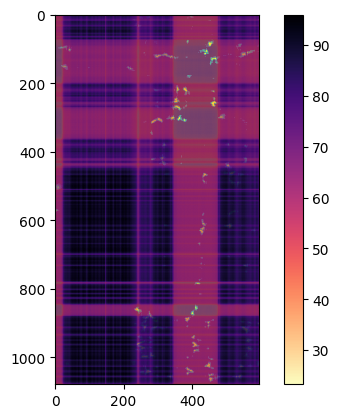

In [5]:
pdma = np.zeros(dma.shape)
pdma[dma < 8] = 1
plt.imshow(pdma, cmap='viridis')
plt.imshow(dme, cmap='magma_r', alpha=dme/dme.max())
plt.colorbar()

In [6]:
with open('test_data/result_model_1_multimer.pkl', 'rb') as f:
    error_file = pickle.load(f)

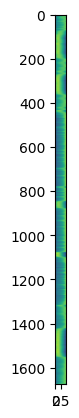

In [7]:
plt.imshow(error_file['predicted_lddt']['logits'])

In [8]:
error_file.keys()

dict_keys(['distogram', 'experimentally_resolved', 'masked_msa', 'predicted_aligned_error', 'predicted_lddt', 'structure_module', 'plddt', 'aligned_confidence_probs', 'max_predicted_aligned_error', 'ptm', 'iptm', 'ranking_confidence'])

In [9]:
error_file['ptm']

array(0.45316575)

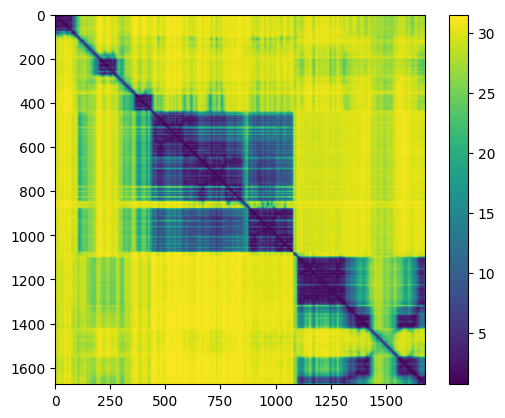

In [10]:
plt.imshow(error_file['predicted_aligned_error'], cmap='viridis')
plt.colorbar()

In [11]:
#TODO Get plddt for both chains (split the long one based on the length of the sequence)
#TODO for each item in the distance map also caluclate the sum of plddt values and perhaps overlay them in the graph

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

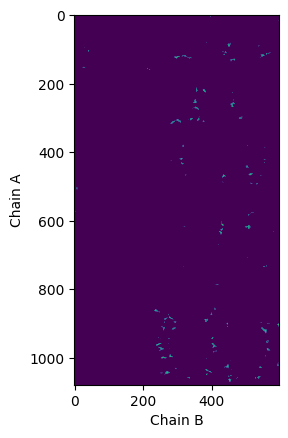

In [13]:
plot_distance_map(dma, distance_threshold=8)

In [2]:
with open('test_data/PPIDB_full.pkl', 'rb') as f:
    data = pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [15]:
with open('test_data/img.pkl', 'wb') as f:
    pickle.dump(dma, f)

In [18]:
with open('test_data/PPIDB_full.pkl', 'rb') as f:
    img = pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [8]:
import json

In [9]:
chainA_name = 'Tdrd7a'
chainB_name = 'ranbp9'
distance_map = dma
plddt_map = dme

json_data = {
    'chainA name': chainA_name,
    'chainB name': chainB_name,
    'distance_map': distance_map.tolist(),
    'plddt_map': plddt_map.tolist(),
}
with open('test_data/data.json', 'w') as f:
    json.dump(json_data, f)
    

In [10]:
with open('/Volumes/terry/PPIDB/libs/full_lib/ran_ranbps/ranbp1-ran/docking_results.json', 'rb') as f:
    data = json.load(f)

In [11]:
data.keys()

dict_keys(['Job name', 'Directory', 'Chain A', 'Chain B', 'Max pDockQ', 'Avg pDockQ', 'weighted pDockQ', 'Max ipTM', 'Max pTM', 'Chain A sequence', 'Chain A length', 'Chain B sequence', 'Chain B length', 'Average pLDDT', 'Distance map', 'pLDDT map'])

In [12]:
npa = np.asarray(data['Distance map'])

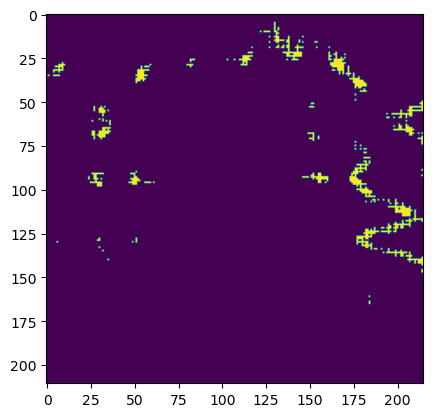

In [15]:
pdma = np.zeros(npa.shape)
pdma[npa < 8] = 1
plt.imshow(pdma)